<a href="https://colab.research.google.com/github/lshpy/DeepLearning_basic/blob/main/5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 트리의 앙상블


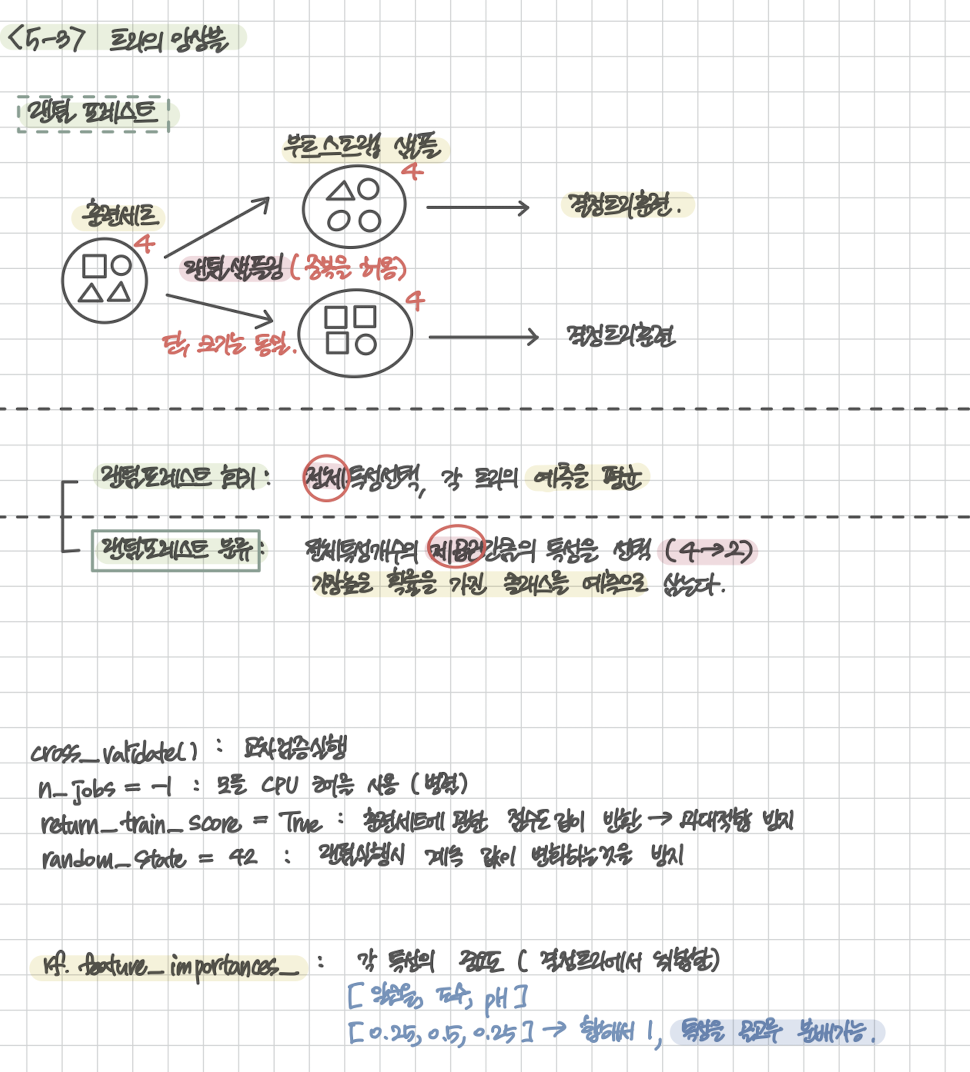

In [1]:
# 정형 데이터 VS 비정형 데이터
# 비정형 데이터 : 데이터베이스나 엑셀로 표현하기 어려운 것
# EX) 텍스트 데이터, 사진, 음악


# 최적의 알고리즘
# 정형 : 앙상블 학습
# 비정형: 신경망 알고리즘

## 랜덤 포레스트

In [2]:
# 앙상블 학습
# 결정트리를 랜덤하게 만들어 결정트리의 숲을 만든다
# 각 결정트리의 예측을 기반으로 최종예측을 만든다


#1. 데이터 준비(훈련데이터에서 랜덤하게 샘플을 추출)--> 샘플이 중복되어 추출 가능
#1. 부트스트랩 샘플(크기는 훈련세트와 같음)

#2. 일부특성을 무작위로 고름(4-> 2개만): RandomForestClassifer
#2. 다 사용 : RandomForestRegressor

#3. 분류 : 각 트리의 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측으로
#3. 회귀 : 단순히 각 트리의 예측을 평균



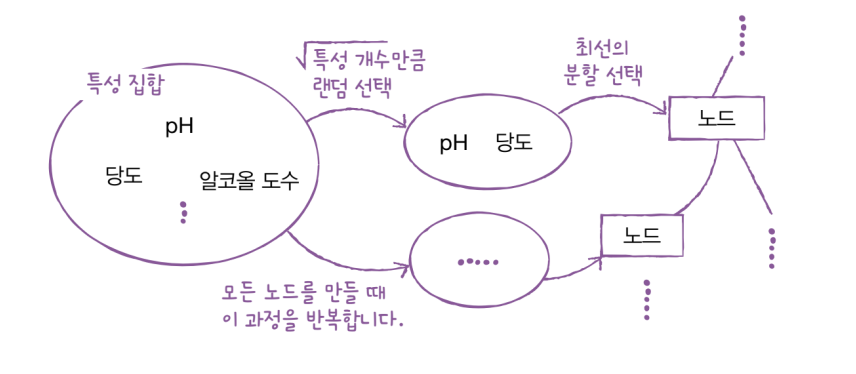

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [4]:
# 교차 검증 수행

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 과대적합


0.9973541965122431 0.8905151032797809


In [5]:
# 랜덤포레스트의 중요도 : 각 결정트리의 중요도를 취합한 것

rf.fit(train_input, train_target)
print(rf.feature_importances_)

# 장점: 하나의 특성에 과도하게 집중하지 않고 더 많은 특성이 훈련할 기회를 얻음

[0.23167441 0.50039841 0.26792718]


In [6]:
# 자체적으로 모델을 평가

# 훈련세트 copy = 부트스트랩 샘플
# 훈련세트 - 부트스트랩 샘플 =OOB 샘플(out og bag)
# 검증 세트의 역할을 할 수 있음!

rf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state= 42)
# oob_score = True,  oob_score을 가져와라

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


# 엑스트라 트리

In [7]:
# 부트스트랩 샘플을 사용하지 않음--> 검증 샘플이 없음!
# 결정트리를 만들때 바로 훈련세트를 사용함
# 뭐를 기준으로 분할하냐? --> 무작위 분할

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(et, train_input, train_target,
                        return_train_score=True, n_jobs =-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9974503966084433 0.8887848893166506


In [9]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


## 그레이디언트 부스팅

In [10]:
# 깊이가 얇은 결정트리를 사용-> 이전 트리의 오차를 보완
# 과대적합에 강하고 높은 일반화 성능을 기대 가능

# 결정트리를 계속 추가하면서 낮은 곳으로 천천히 이동(그래서 깊이가 얕은거 사용)
# 학습률 매개변수 --> 속도조절



In [11]:
# 데이터셋의 교차 검증 점수


from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# 거의 과대적합되지 않은것을 확인 할 수 있음!

0.8881086892152563 0.8720430147331015


In [12]:
# 결정트리 개수 증가(5--> 500)
gb = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.2,
                                random_state=42)

scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs = -1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9464595437171814 0.8780082549788999


In [13]:
# 특성별 중요도
gb.fit(train_input, train_target)
print(gb.feature_importances_)


[0.15872278 0.68010884 0.16116839]


In [14]:
# 그레디언트 부스팅의 단점
# 순서대로 트리를 추가
# 병렬처리가 안되서 속도가 느림--> n_jobs(x)

## 히스토그램 기반 그레이디언트 부스팅

In [15]:
# 입력 특성을 256개의 구간으로 나눈다
# 누락값을 위해서 전처리 할 필요 없음

In [19]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input ,train_target,
                        return_train_score=True)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9321723946453317 0.8801241948619236


In [21]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result  = permutation_importance(hgb, train_input, train_target, n_repeats = 10,
                                 random_state=42, n_jobs=-1)

# 특성별 중요도
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [22]:
# 테스트 세트에서의 특성별 중요도
result  = permutation_importance(hgb, test_input, test_target, n_repeats = 10, random_state=42, n_jobs=-1)

print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [23]:
hgb.score(test_input, test_target)

0.8723076923076923

## XGBoost

In [24]:
from xgboost import XGBClassifier

xgb= XGBClassifier(tree_method = 'hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target,
                        return_train_score = True)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686


## LightGBM

In [25]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores  = cross_validate(lgb, train_input, train_target, return_train_score = True,
                         n_jobs=-1)

In [26]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884


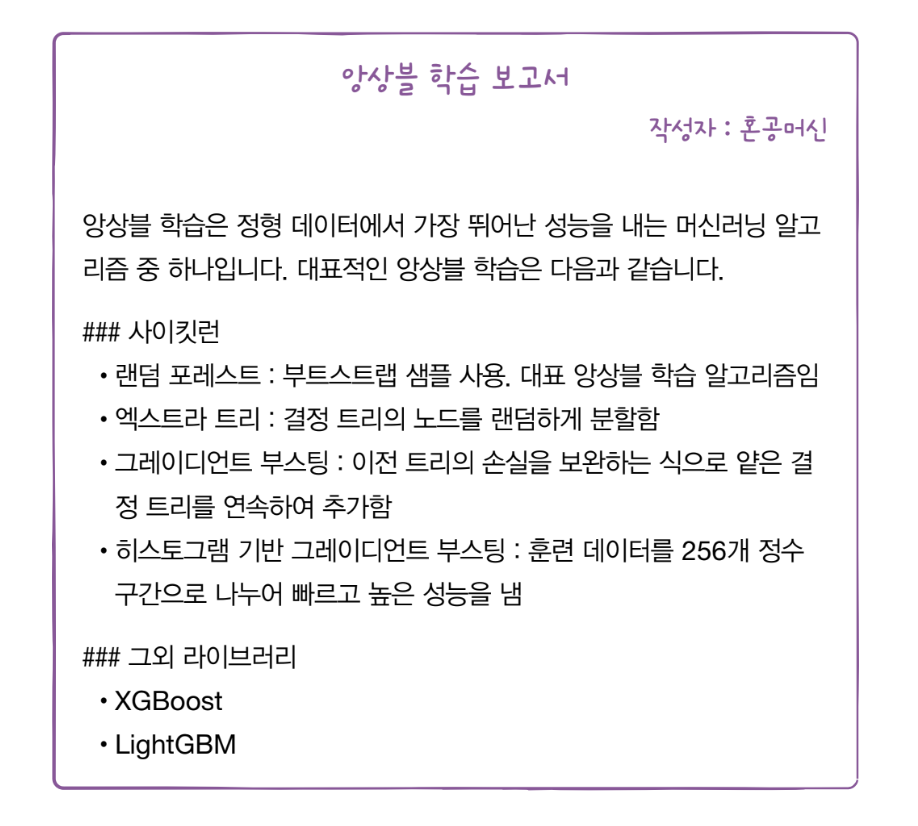